In [18]:
import lightgbm as lgb
import catboost as ct
import numpy as np
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib.pylab import plt
%matplotlib inline
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [19]:
data=california_housing.fetch_california_housing()

In [20]:
x=data.data

In [21]:
y=data.target

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

In [23]:
def plt_sct(y_test,preds):
    print('MSE - ',mean_squared_error(y_test,preds))
    print('MAE - ',mean_absolute_error(y_test,preds))
    plt.scatter(y_test,preds)

MSE -  0.5081473282760907
MAE -  0.526688386337575


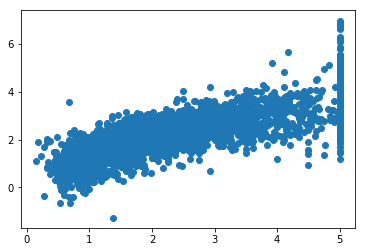

In [24]:
clf = Ridge(alpha=0.01)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)

MSE -  0.2547198970880507
MAE -  0.3298217297479874


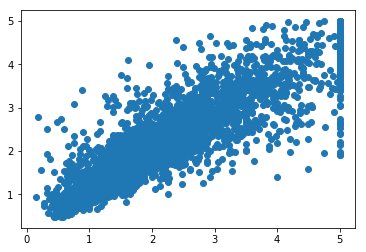

In [25]:
clf = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)

MSE -  0.23850566603387224
MAE -  0.3215283787507927


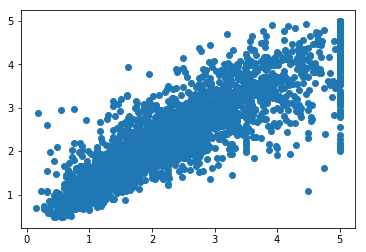

In [26]:
clf = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)

/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE -  0.32677265827813745
MAE -  0.4060993299789255


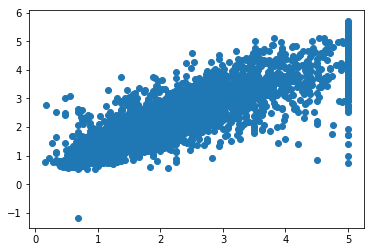

In [27]:
clf = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)

MSE -  0.20996574234740775
MAE -  0.3093379057338645


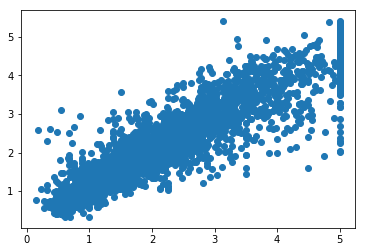

In [28]:
clf = GradientBoostingRegressor(n_estimators=580,max_depth=4)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)

# Simple implementation

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
def get_oof_pre(clf,x_train,y_train,x_test,kf):
    oof_pred = np.zeros_like(y_train)
    for train_index,test_index in kf.split(x_train,y_train):
        x_trn,x_tst = x_train[train_index],x_train[test_index]
        y_trn,y_tst = y_train[train_index],y_train[test_index]
        clf.fit(x_trn,y_trn)
        oof_pred[test_index]=clf.predict(x_tst)
    clf.fit(x_train,y_train)
    tst_pred = clf.predict(x_test)
    return oof_pred,tst_pred

/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE -  0.20464753049449344
MAE -  0.3018846867866799


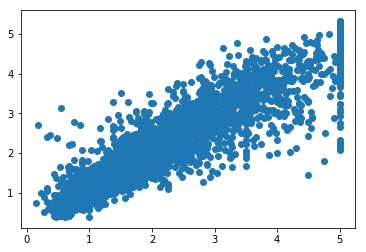

In [31]:
clf1_0 = Ridge(alpha=0.01)
clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)

clf2_0 = Ridge(random_state=2112,alpha=0.01)

models = [clf1_0,clf1_1,clf1_2,clf1_3,clf1_4]
kf = KFold(n_splits=3,random_state=2121)
for i,model in enumerate(models):
    x_off,tst_pred = get_oof_pre(model,x_train,y_train,x_test,kf)
    if i==0:
        S_train = x_off.reshape(-1,1)
        S_test = tst_pred.reshape(-1,1)
    else:
        S_train = np.column_stack([S_train,x_off.reshape(-1,1)])
        S_test = np.column_stack([S_test,tst_pred.reshape(-1,1)])

clf = clf2_0
clf.fit(S_train,y_train)
preds = clf.predict(S_test)
plt_sct(y_test,preds)